<a href="https://colab.research.google.com/github/MHuzaifaAlam/Daibaties_prediction/blob/main/daibaties_nureal_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


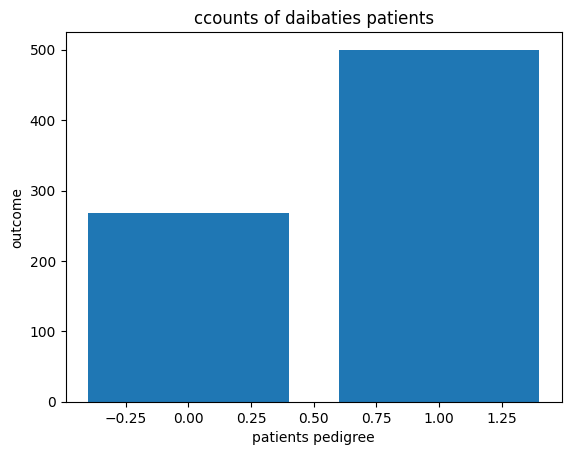

In [5]:
x = data['Outcome'].unique()
y = data['Outcome'].value_counts()
plt.bar(x,y)
plt.xlabel('patients pedigree')
plt.ylabel('outcome')
plt.title("ccounts of daibaties patients")

plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
data['DiabetesPedigreeFunction'].fillna('NO IDEA',inplace = True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

/tmp/ipython-input-2566201305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DiabetesPedigreeFunction'].fillna('NO IDEA',inplace = True)


In [9]:
data['DiabetesPedigreeFunction']=le.fit_transform(data['DiabetesPedigreeFunction'])
data['Outcome']=le.fit_transform(data['Outcome'])

In [10]:
data['Pregnancies']=le.fit_transform(data['Pregnancies'])
data['Glucose']=le.fit_transform(data['Glucose'])
data['BloodPressure']=le.fit_transform(data['BloodPressure'])
data['SkinThickness']=le.fit_transform(data['SkinThickness'])
data['Insulin']=le.fit_transform(data['Insulin'])
data['BMI']=le.fit_transform(data['BMI'])



In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,50,1
1,1,23,19,22,0,62,196,31,0
2,8,121,17,0,0,30,368,32,1
3,1,27,19,16,62,77,53,21,0
4,0,75,4,28,102,209,514,33,1


In [12]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,39,25,41,108,118,55,63,0
764,2,60,21,20,0,155,187,27,0
765,5,59,22,16,71,58,115,30,0
766,1,64,14,0,0,95,195,47,1
767,1,31,21,24,0,98,169,23,0


In [13]:
x=data.drop('Outcome',axis =1)
y=data['Outcome']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8)

In [15]:
from sklearn.linear_model import LogisticRegression # importing model
mymodel = LogisticRegression() # creating object of model

mymodel.fit(x_train,y_train) # training model
print('Model is trained well.........')

Model is trained well.........


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
cv=mymodel.predict(x_test)

In [17]:
print(accuracy_score(y_test, cv)*100)
print(classification_report(y_test, cv))

79.87012987012987
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.71      0.67      0.69        51

    accuracy                           0.80       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



In [18]:
from sklearn.svm import SVC
full=SVC()


In [19]:

full.fit(x_train, y_train)
print('SVM model is trained successfully...')

SVM model is trained successfully...


In [20]:
svm_prediction=full.predict(x_test)

In [21]:
accuracy =accuracy_score(y_test,svm_prediction)*100

In [22]:
classification_report(svm_prediction,y_test)

'              precision    recall  f1-score   support\n\n           0       0.94      0.80      0.87       121\n           1       0.53      0.82      0.64        33\n\n    accuracy                           0.81       154\n   macro avg       0.74      0.81      0.75       154\nweighted avg       0.85      0.81      0.82       154\n'

In [23]:
print(accuracy)

80.51948051948052


NEURAL NETWORK

In [24]:
import tensorflow

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
x_train.shape

(614, 8)

In [27]:
model=Sequential()

In [28]:
model.add(Dense(50, input_shape = (8,), activation = 'relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.add(Dense(10, activation='relu'))

In [30]:
model.add(Dense(10, activation='relu'))

In [31]:
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs = 35)

Epoch 1/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5232 - loss: 1.9054
Epoch 2/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4720 - loss: 1.0106 
Epoch 3/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5200 - loss: 0.7913 
Epoch 4/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5498 - loss: 0.7547 
Epoch 5/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4882 - loss: 0.7426 
Epoch 6/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5902 - loss: 0.7303 
Epoch 7/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5875 - loss: 0.6661 
Epoch 8/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6683 
Epoch 9/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5814 - loss: 0.6709 
Epoch 10/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6607 - loss: 0.6266 
Epoch 11/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6697 - loss: 0.6269 
Epoch 12/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0